In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquakes-in-romania-from-2012-to-2024/romanianEarthquakes-03-nov-2024.csv


# Intro

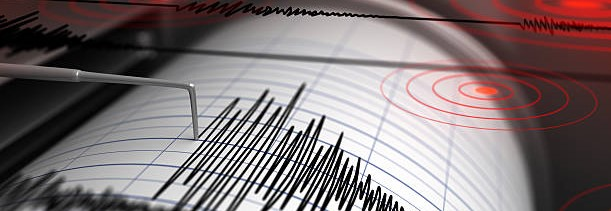

Hello, in this notebook we will explore the dataset of earthquakes in romania and do some really nice graphs! Out of the dataset we are not interested in all columns, just a few of them.

Let's dive in!

# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

# Load the data and minor data analysis

In [3]:
df = pd.read_csv("/kaggle/input/earthquakes-in-romania-from-2012-to-2024/romanianEarthquakes-03-nov-2024.csv")

df.head()

,dateTime,magnitude,magnitude type,depth,latitude,longitude,zone description
0,2024-10-31 00:00:17,2.1,ML,19.7,45.2831,27.2761,MUNTENIA BUZAU
1,2024-10-30 12:15:29,2.0,ML,14.7,46.1699,25.6946,TRANSILVANIA COVASNA
2,2024-10-28 09:37:37,2.0,ML,13.5,45.2636,27.2377,MUNTENIA BUZAU
3,2024-10-28 07:41:42,2.1,ML,12.5,45.2416,27.2101,MUNTENIA BUZAU
4,2024-10-26 10:25:16,2.0,ML,6.1,45.7058,21.8558,BANAT TIMIS


Let's see the min and max dateTime, the min max magnitude and the rows count.

In [4]:
df["dateTime"].min(), df["dateTime"].max()

('2012-09-17 07:26:17', '2024-10-31 00:00:17')

In [5]:
df["magnitude"].min(), df["magnitude"].max()

(2.0, 5.9)

In [6]:
len(df)

3714

# Utility method
Declare a utility method that we will use to set color of the bar depending of the magnitude value

In [7]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    
    return np.array(palette).take(indices, axis=0)

# Earthquake greater of 4.2 magnitude

In [8]:
earthQuakesAbove4Df = df.loc[df["magnitude"] >= 4.2].sort_values("dateTime")

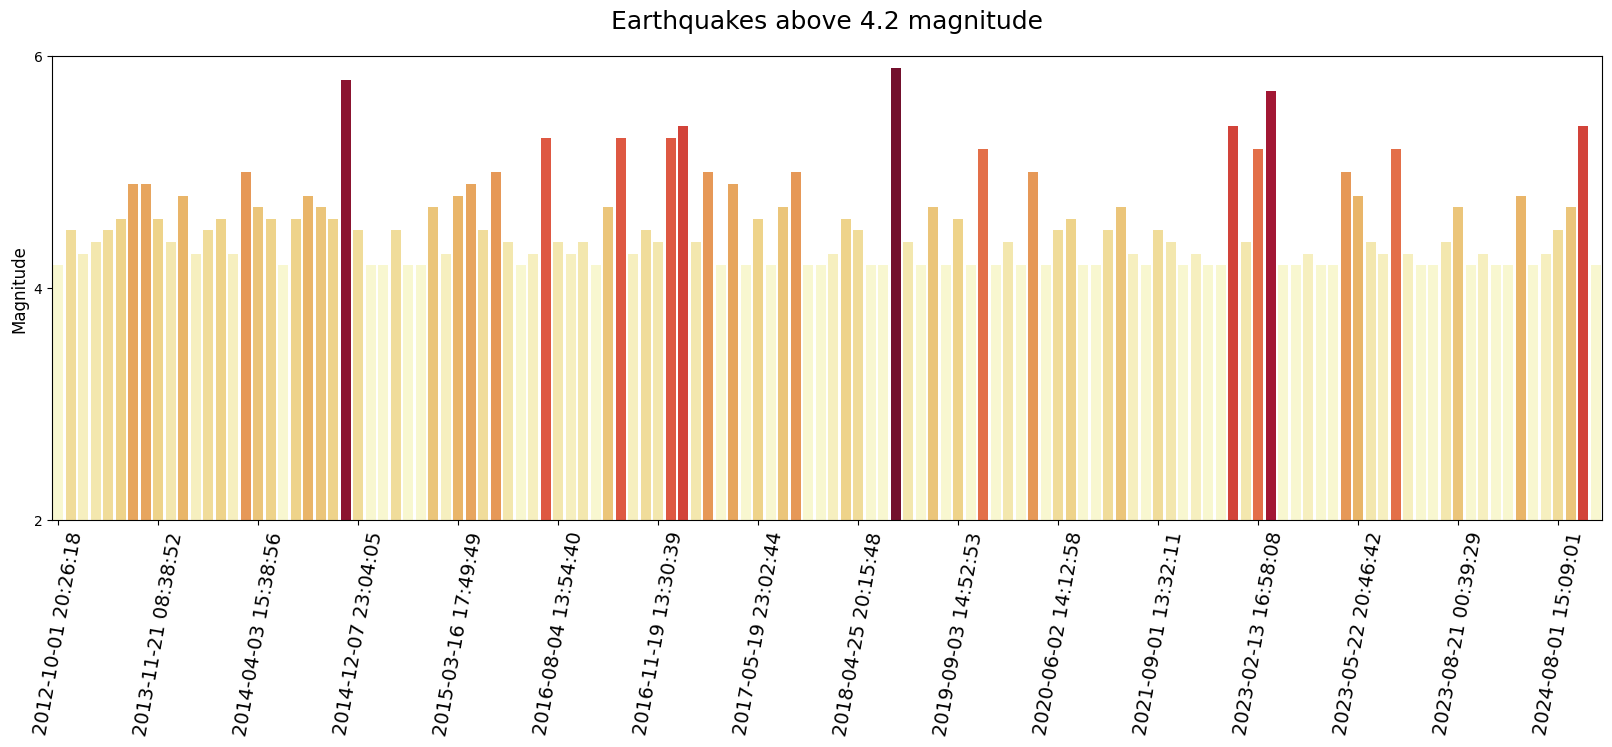

In [9]:
plt.figure(figsize = (20, 8))

ax = sns.barplot(x=earthQuakesAbove4Df["dateTime"], y=earthQuakesAbove4Df["magnitude"], palette=colors_from_values(earthQuakesAbove4Df["magnitude"], "YlOrRd"))
ax.set_title("Earthquakes above 4.2 magnitude", size = 18, pad = 20)


plt.yticks([2, 4, 6])
plt.ylim(2, 6)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=80, fontsize=14)
plt.xlabel("", size = 12)
plt.ylabel("Magnitude", size = 12)

plt.subplots_adjust(bottom=0.30)

dataSetSize = earthQuakesAbove4Df["dateTime"].size
plt.xticks(np.arange(0, dataSetSize, round((dataSetSize / 12)/8)*8))

plt.show()

# Plot the earthquakes above magnitude 5

In [10]:
earthQuakesAbove5Df = df.loc[df["magnitude"] >= 5].sort_values("dateTime")

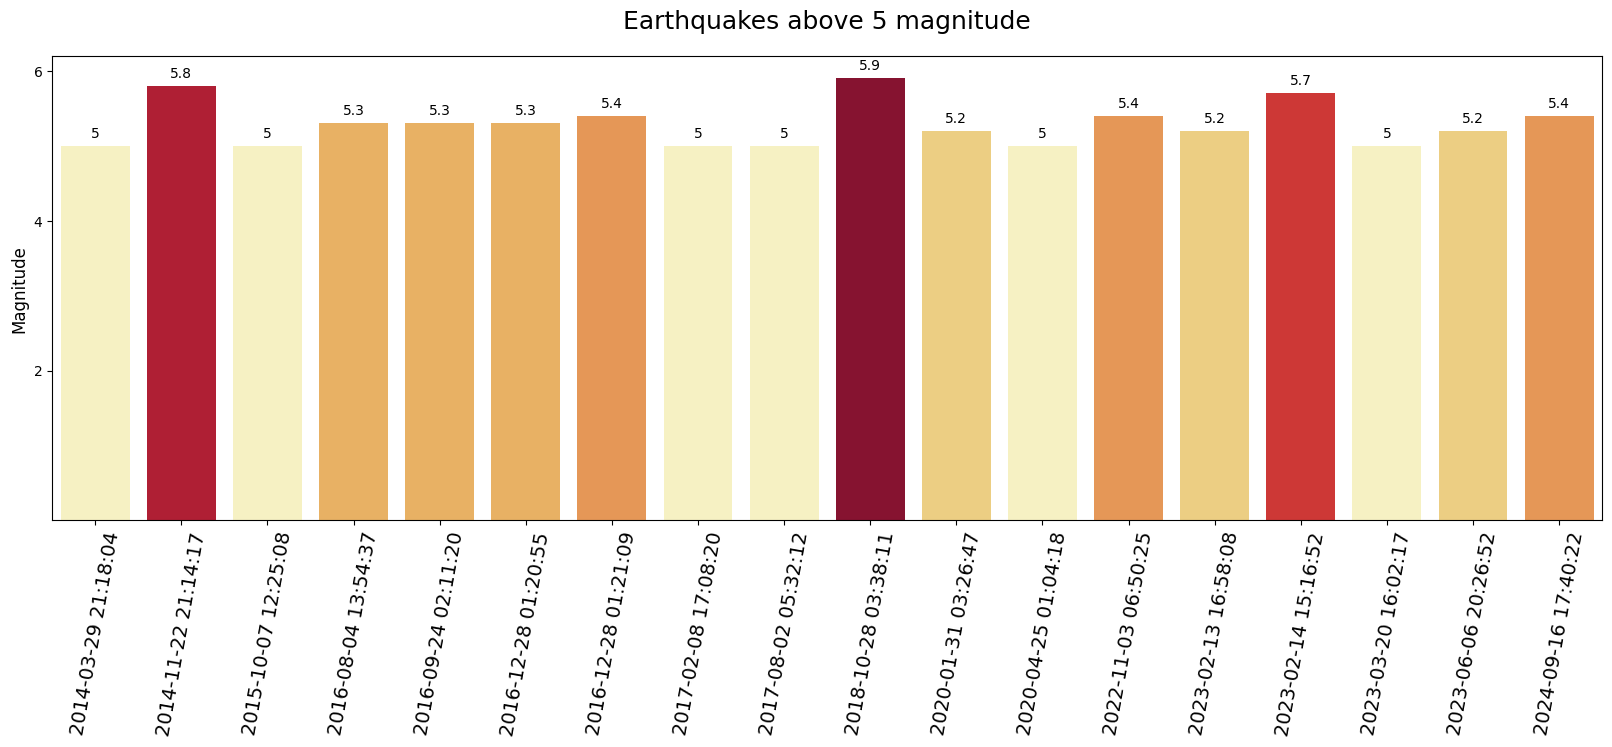

In [11]:
plt.figure(figsize = (20, 8))

ax = sns.barplot(data=earthQuakesAbove5Df, x=earthQuakesAbove5Df["dateTime"], y="magnitude", palette=colors_from_values(earthQuakesAbove5Df["magnitude"], "YlOrRd"))
ax.set_title("Earthquakes above 5 magnitude", size = 18, pad = 20)
ax.bar_label(ax.containers[0], padding=4)
# , fmt='.4f'

plt.yticks([2, 4, 6])

# rank = data.argsort().argsort()
# pal = sns.color_palette("Greens_d", len(earthQuakesAbove5Df))

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=80, fontsize=14)
plt.xlabel("", size = 12)
plt.ylabel("Magnitude", size = 12)

# alternate option without .gcf
plt.subplots_adjust(bottom=0.30)

# Earthquakes by manitude
Now we will group the earthquakes by magnitude and plot them on a pie chart.

In [12]:
magnitudeCount = {}

for index, row in df.iterrows():
    magnitude = int(row["magnitude"])

    if magnitude in magnitudeCount.keys():
        found = magnitudeCount[magnitude]
        magnitudeCount[magnitude] = found + 1
    else:
        magnitudeCount[magnitude] = 1

([<matplotlib.patches.Wedge at 0x7e1467c6cd60>,
 [Text(-0.6278370324649646, 1.1611290456558165, '2 - 3 magnitude'),
  Text(0.42020073045288897, -1.2513318289434097, '3 - 4 magnitude'),
  Text(1.3952603317310266, -0.2639102246935993, '4 - 5 magnitude'),
  Text(1.419835406464953, -0.021619864673529006, '5 - 6 magnitude')],
 [Text(-0.3424565631627079, 0.6333431158122635, '65.8%'),
  Text(0.2292003984288485, -0.6825446339691325, '28.8%'),
  Text(0.8057137126897477, -0.15239886214700804, '5.0%'),
  Text(0.8199049530290573, -0.012484710586122383, '0.5%')])

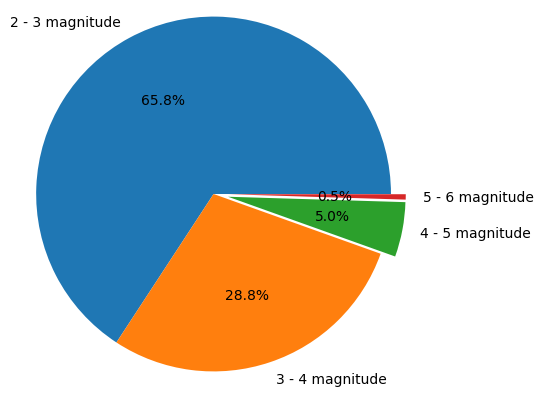

In [13]:
labels = ["2 - 3 magnitude", "3 - 4 magnitude", "4 - 5 magnitude", "5 - 6 magnitude"]
values = [magnitudeCount[2], magnitudeCount[3], magnitudeCount[4], magnitudeCount[5]]
# explode the last two categories
explode = [0, 0, 0.1, 0.1]

plt.pie(values, labels=labels, autopct='%1.1f%%', radius=1.2, explode=explode)

# Plot the earthquakes above 5 on a map

Time has come to do our prittiest graph, we will plot the earthqukes above 5 on a map of Romania!

In [14]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(earthQuakesAbove5Df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="magnitude",
                        hover_data=["magnitude"],
                        color="magnitude",
                        color_continuous_scale=color_scale,
                        size="magnitude",
                        zoom=5.5,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})



# Finish
You have made it to the finish, thank you :)